In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
traffic_data = pd.read_csv("traffic_flow_data.csv")
signal_data = pd.read_csv("signal_timings_data.csv")

In [6]:
merged_data = pd.merge(traffic_data, signal_data, on="Intersection")

intersection_signal_analysis = merged_data.groupby("Intersection").agg({
    "Green_Light_Duration": "mean",
    "Red_Light_Duration": "mean",
    "Vehicle_Count": "sum"
}).reset_index()

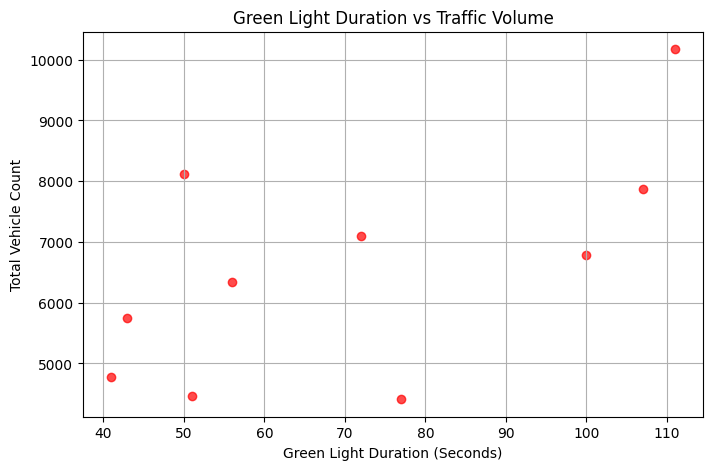

In [7]:
plt.figure(figsize=(8, 5))
plt.scatter(intersection_signal_analysis["Green_Light_Duration"], intersection_signal_analysis["Vehicle_Count"], color="red", alpha=0.7)
plt.title("Green Light Duration vs Traffic Volume")
plt.xlabel("Green Light Duration (Seconds)")
plt.ylabel("Total Vehicle Count")
plt.grid(True)
plt.savefig("green_light_vs_traffic.png")
plt.show()

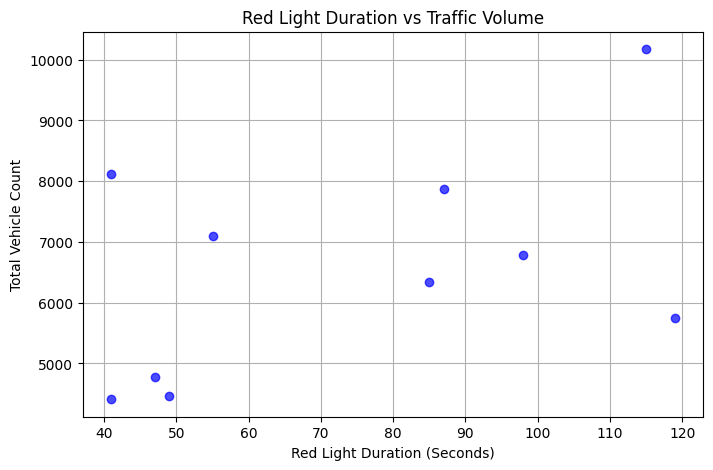

In [8]:
plt.figure(figsize=(8, 5))
plt.scatter(intersection_signal_analysis["Red_Light_Duration"], intersection_signal_analysis["Vehicle_Count"], color="blue", alpha=0.7)
plt.title("Red Light Duration vs Traffic Volume")
plt.xlabel("Red Light Duration (Seconds)")
plt.ylabel("Total Vehicle Count")
plt.grid(True)
plt.savefig("red_light_vs_traffic.png")
plt.show()

In [12]:
import seaborn as sns

In [13]:
traffic_data = pd.read_csv("traffic_flow_data.csv")
traffic_data["Time"] = pd.to_datetime(traffic_data["Hour"])
hourly_traffic = traffic_data.groupby("Hour")["Vehicle_Count"].sum().reset_index()

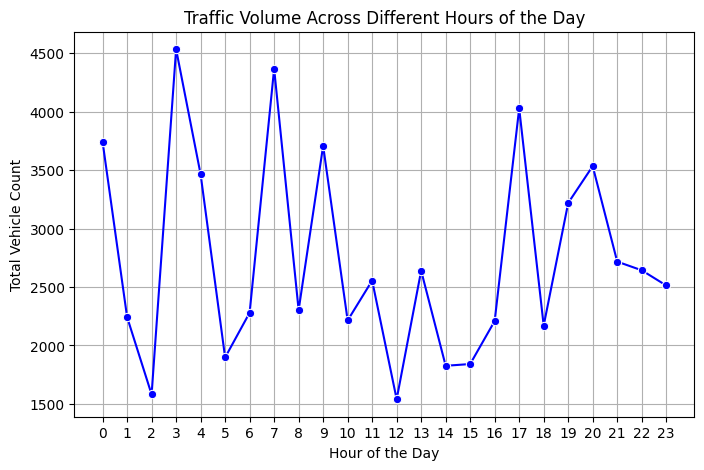

In [14]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_traffic["Hour"], y=hourly_traffic["Vehicle_Count"], marker="o", color="blue")
plt.title("Traffic Volume Across Different Hours of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Vehicle Count")
plt.xticks(range(0, 24))
plt.grid(True)
plt.savefig("traffic_volume_by_hour.png")
plt.show()

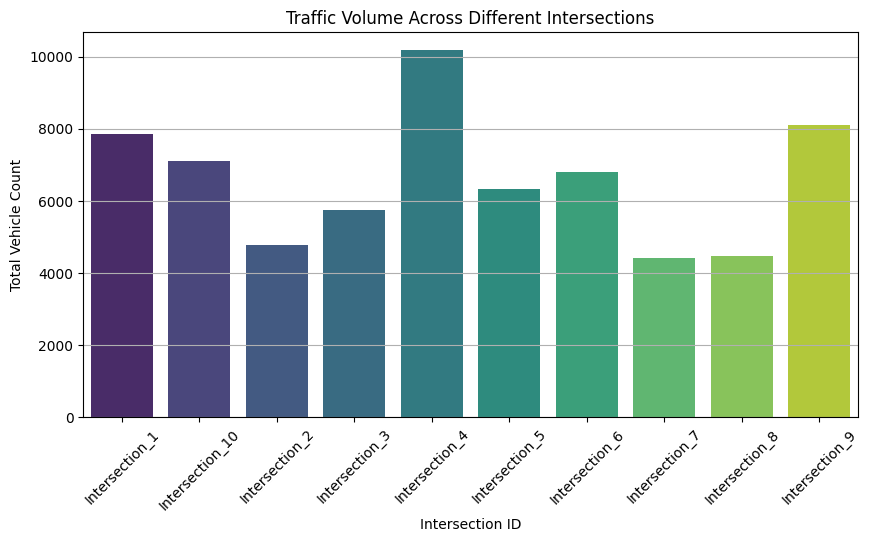

In [15]:
intersection_traffic = traffic_data.groupby("Intersection")["Vehicle_Count"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    x="Intersection", 
    y="Vehicle_Count", 
    data=intersection_traffic, 
    hue="Intersection",  # Assign x variable to hue
    palette="viridis", 
    legend=False  # Remove the legend
)
plt.title("Traffic Volume Across Different Intersections")
plt.xlabel("Intersection ID")
plt.ylabel("Total Vehicle Count")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.savefig("traffic_volume_by_intersection.png")
plt.show()